In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from numpy.linalg import inv
from numpy.random import normal as rnorm
from statsmodels.stats.outliers_influence import OLSInfluence
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
blablacar_trips_matched_with_cheapest_replacing_train = pd.read_csv('blablacar_trips_matched_with_cheapest_replacing_train.csv')

In [16]:
blablacar_trips_matched_with_cheapest_replacing_train[['region','dep_city','dep_time_slot','arr_city','blablacar_price','blablacar_duration_in_min','train_price','train_nb_changes','train_duration_in_min','Paris_is_dep_city']].head()

,region,dep_city,dep_time_slot,arr_city,blablacar_price,blablacar_duration_in_min,train_price,train_nb_changes,train_duration_in_min,Paris_is_dep_city
0,0,Paris,4,Nantes,32,230,NaN,NaN,NaN,Yes
1,0,Paris,1,Nantes,25,240,19.0,0.0,224.0,Yes
2,0,Paris,1,Nantes,29,290,19.0,0.0,224.0,Yes
3,0,Paris,1,Nantes,27,220,19.0,0.0,224.0,Yes
4,0,Paris,1,Nantes,31,240,19.0,0.0,224.0,Yes


In [7]:
blablacar_trips_matched_with_cheapest_replacing_train.corr()

,region,dep_time_slot,blablacar_arr_time_slot,blablacar_price,blablacar_distance_in_km,blablacar_duration_in_min,blablacar_price_per_km,train_arr_time_slot,train_duration_in_min,train_nb_changes,train_price,train_distance_in_km,train_price_per_km
region,1.000000,0.083964,-0.057054,-0.422809,-0.467937,-0.449836,0.179715,-0.058921,-0.218245,0.035785,-0.215787,-0.532591,0.247584
dep_time_slot,0.083964,1.000000,0.781798,-0.117627,-0.160753,-0.159408,0.071513,0.786369,-0.072569,-0.073581,0.074148,-0.155323,0.243956
blablacar_arr_time_slot,-0.057054,0.781798,1.000000,0.135892,0.120130,0.127735,0.007984,0.758379,0.052795,-0.019332,0.212846,0.144273,0.119378
blablacar_price,-0.422809,-0.117627,0.135892,1.000000,0.865306,0.865564,0.178301,0.138672,0.378801,0.146430,0.473401,0.837298,-0.251644
blablacar_distance_in_km,-0.467937,-0.160753,0.120130,0.865306,1.000000,0.985288,-0.261045,0.115331,0.407720,0.137115,0.510101,0.971860,-0.319064
blablacar_duration_in_min,-0.449836,-0.159408,0.127735,0.865564,0.985288,1.000000,-0.236262,0.119991,0.405469,0.154218,0.522394,0.953976,-0.294238
blablacar_price_per_km,0.179715,0.071513,0.007984,0.178301,-0.261045,-0.236262,1.000000,0.022480,-0.067787,-0.038146,-0.128861,-0.281535,0.111763
train_arr_time_slot,-0.058921,0.786369,0.758379,0.138672,0.115331,0.119991,0.022480,1.000000,0.162769,0.155530,0.210337,0.110524,0.139242
train_duration_in_min,-0.218245,-0.072569,0.052795,0.378801,0.407720,0.405469,-0.067787,0.162769,1.000000,0.283387,0.259328,0.393275,-0.051473
train_nb_changes,0.035785,-0.073581,-0.019332,0.146430,0.137115,0.154218,-0.038146,0.155530,0.283387,1.000000,0.321289,0.111567,0.263160


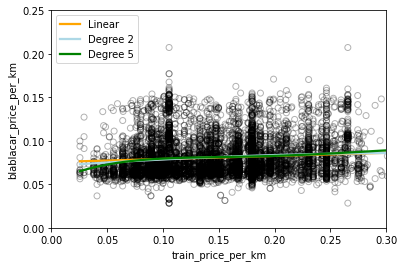

In [5]:
# Figure 8 
fig, ax = plt.subplots(1,1)
#ax.set_title('Figure 8')

# Plot polinomials of different degree
#print(blablacar_trips_matched_with_cheapest_replacing_train['train_price_per_km'],blablacar_trips_matched_with_cheapest_replacing_train['blablacar_price_per_km'])
plt.scatter(x=blablacar_trips_matched_with_cheapest_replacing_train['train_price_per_km'], y=blablacar_trips_matched_with_cheapest_replacing_train['blablacar_price_per_km'], facecolors='None', edgecolors='k', alpha=.3) 
sns.regplot(x=blablacar_trips_matched_with_cheapest_replacing_train['train_price_per_km'], y=blablacar_trips_matched_with_cheapest_replacing_train['blablacar_price_per_km'], ci=None, label='Linear', scatter=False, color='orange')
sns.regplot(x=blablacar_trips_matched_with_cheapest_replacing_train['train_price_per_km'], y=blablacar_trips_matched_with_cheapest_replacing_train['blablacar_price_per_km'], ci=None, label='Degree 2', order=2, scatter=False, color='lightblue')
sns.regplot(x=blablacar_trips_matched_with_cheapest_replacing_train['train_price_per_km'], y=blablacar_trips_matched_with_cheapest_replacing_train['blablacar_price_per_km'], ci=None, label='Degree 5', order=5, scatter=False, color='g')
plt.legend()
plt.ylim(0,0.25)
plt.xlim(0,0.3);

In [6]:
regression_eq = 'blablacar_price_per_km ~ np.log(blablacar_duration_in_min) + BlablacarBus_available + BlablacarBus_available*train_price_per_km + train_price_per_km + Paris_is_dep_city + Paris_is_dep_city*train_price_per_km + train_nb_changes + route + region '

est = sm.OLS.from_formula(regression_eq, blablacar_trips_matched_with_cheapest_replacing_train).fit()
est.summary().

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     blablacar_price_per_km   R-squared:                       0.187
Model:                                OLS   Adj. R-squared:                  0.177
Method:                     Least Squares   F-statistic:                     20.16
Date:                    Thu, 26 Jan 2023   Prob (F-statistic):          2.28e-277
Time:                            15:43:26   Log-Likelihood:                 19629.
No. Observations:                    7824   AIC:                        -3.908e+04
Df Residuals:                        7735   BIC:                        -3.846e+04
Df Model:                              88                                         
Covariance Type:                nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            0.0249      0.012      2.126      0.034       0.002       0.048
BlablacarBus_available[T.Yes]                        0.0014      0.002      0.684      0.494      -0.003       0.005
Paris_is_dep_city[T.Yes]                             0.0041      0.003      1.200      0.230      -0.003       0.011
route[T.Bordeaux,Marseille]                         -0.0024      0.005     -0.476      0.634      -0.012       0.007
route[T.Bordeaux,Montpellier]                        0.0060      0.004      1.637      0.102      -0.001       0.013
route[T.Bordeaux,Nice]                               0.0012      0.009      0.129      0.897      -0.017       0.019
route[T.Bordeaux,Toulouse]                           0.0127      0.003      4.130      0.000       0.007       0.019
route[T.Brest,Nantes]                                0.0108      0.004      3.065      0.002       0.004       0.018
route[T.Brest,Poitiers]                             -0.0064      0.009     -0.691      0.490      -0.025       0.012
route[T.Brest,Rennes]                                0.0045      0.004      1.255      0.209      -0.003       0.011
route[T.Lille,Lyon]                                 -0.0095      0.005     -2.046      0.041      -0.019      -0.000
route[T.Lille,Marseille]                            -0.0165      0.014     -1.152      0.250      -0.045       0.012
route[T.Lille,Nantes]                                0.0054      0.006      0.858      0.391      -0.007       0.018
route[T.Lille,Paris]                                 0.0150      0.003      4.478      0.000       0.008       0.022
route[T.Lille,Reims]                                 0.0227      0.004      5.544      0.000       0.015       0.031
route[T.Lyon,Bordeaux]                              -0.0015      0.004     -0.417      0.677      -0.008       0.005
route[T.Lyon,Lille]                                 -0.0063      0.006     -1.095      0.274      -0.018       0.005
route[T.Lyon,Marseille]                              0.0073      0.003      2.639      0.008       0.002       0.013
route[T.Lyon,Montpellier]                            0.0098      0.003      3.305      0.001       0.004       0.016
route[T.Lyon,Nantes]                                -0.0085      0.005     -1.854      0.064      -0.017       0.000
route[T.Lyon,Nice]                                   0.0029      0.003      0.856      0.392      -0.004       0.010
route[T.Lyon,Paris]                                 -0.0007      0.003     -0.236      0.813      -0.007       0.005
route[T.Lyon,Reims]                                  0.0076      0.004      1.721      0.085      -0.001       0.0

In [7]:
y = blablacar_trips_matched_with_cheapest_replacing_train['blablacar_price_per_km']
y_mean = np.mean(y)
TSS = sum((y - y_mean)**2)
RSS = sum(est.resid**2)
print("TSS: ", TSS)
print("RSS: ", RSS)

TSS:  4.183344737394306
RSS:  3.032960484233168


In [8]:
val=blablacar_trips_matched_with_cheapest_replacing_train.fillna(0)

In [9]:
regression_eq_cluster = 'blablacar_price_per_km ~ np.log(blablacar_duration_in_min) + BlablacarBus_available + BlablacarBus_available*train_price_per_km + train_price_per_km + Paris_is_dep_city + Paris_is_dep_city*train_price_per_km + train_nb_changes + region '
results_clus = smf.ols(regression_eq_cluster, data=val).fit(
    cov_type="cluster", cov_kwds={"groups": val["route"]}
)
print(results_clus.summary())

                              OLS Regression Results                              
Dep. Variable:     blablacar_price_per_km   R-squared:                       0.080
Model:                                OLS   Adj. R-squared:                  0.079
Method:                     Least Squares   F-statistic:                     7.210
Date:                    Thu, 26 Jan 2023   Prob (F-statistic):           1.28e-07
Time:                            15:43:26   Log-Likelihood:                 21810.
No. Observations:                    8889   AIC:                        -4.360e+04
Df Residuals:                        8879   BIC:                        -4.353e+04
Df Model:                               9                                         
Covariance Type:                  cluster                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------

C:\Users\elie nakad\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 9
  warnings.warn('covariance of constraints does not have full '


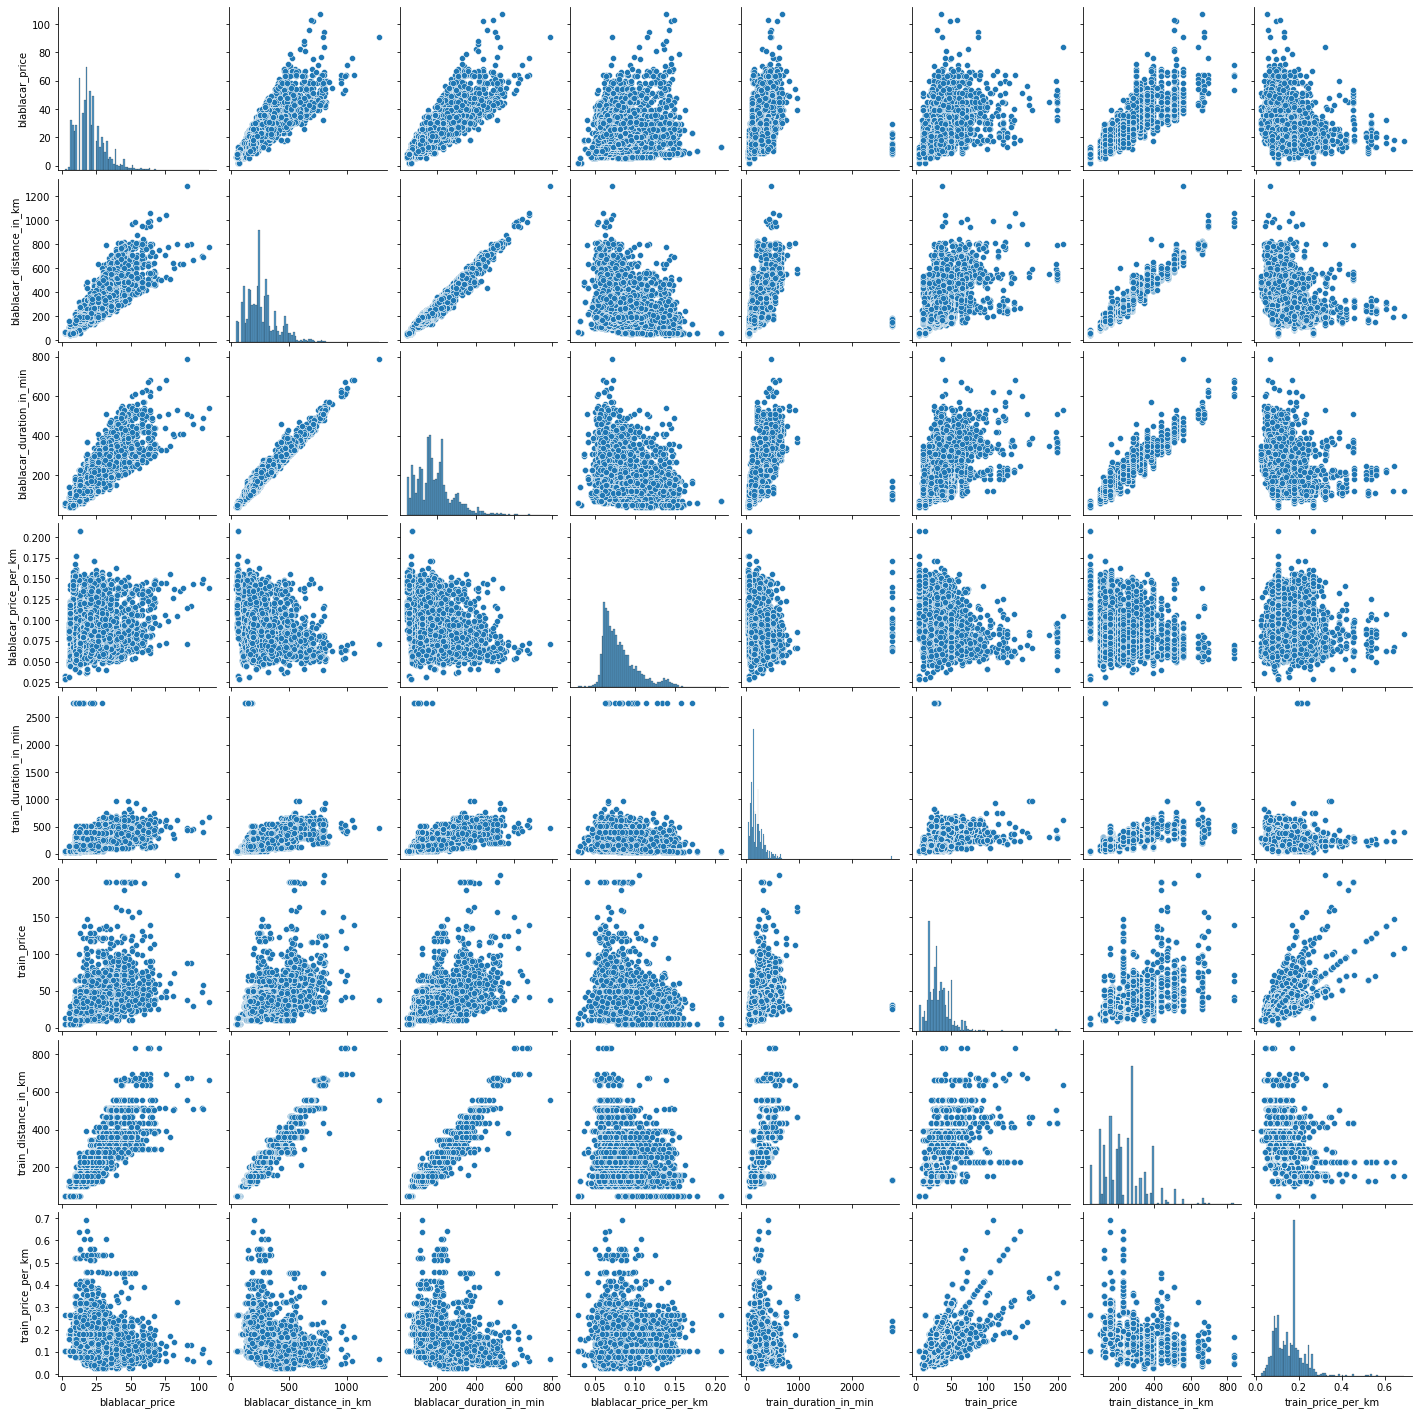

In [10]:
sns.pairplot(blablacar_trips_matched_with_cheapest_replacing_train[['blablacar_price','blablacar_distance_in_km','blablacar_duration_in_min','blablacar_price_per_km','train_duration_in_min','train_price','train_distance_in_km','train_price_per_km']]);

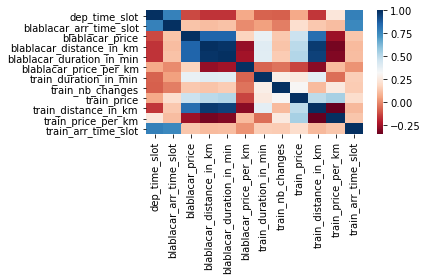

In [17]:
corr=blablacar_trips_matched_with_cheapest_replacing_train[['dep_time_slot','blablacar_arr_time_slot','blablacar_price','blablacar_distance_in_km','blablacar_duration_in_min','blablacar_price_per_km','train_duration_in_min','train_nb_changes','train_price','train_distance_in_km','train_price_per_km','train_arr_time_slot']].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu');
plt.tight_layout()
plt.savefig("test.png", dpi=150)